# Structure de données : GRAPHE

### Une situation pour démarrer

Alban, Béatrice, Charles, Déborah, Eric, Fatima, Gérald, Hélène et Ivan sont inscrits sur un réseau social. 

Le principe de ce réseau, est que si « X est ami avec Y » alors « Y est ami avec X ».

* Déborah est amie avec Alban, Béatrice, Charles et Gérald.
* Eric est ami avec Alban et Béatrice
* Alban est ami avec Béatrice, Déborah, Eric et Fatima.
* Charles, lui, est ami avec Béatrice, Déborah et Hélène.
* Fatima est amie avec Ivan
* Gérald est, lui, ami avec Béatrice et Déborah

#### 1) Qui a le plus de relations? le moins? 

Le Plus: Béatrice

Le Moins: Ivan et Charles

#### 2) Donner une représentation graphique des relations sur ce réseau (sur papier)!
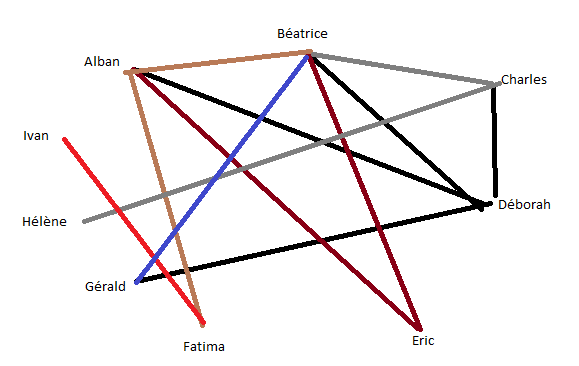

#### Représentation possible en python : **matrice d'adjacence**

In [1]:
membres = ['Alban', 'Béatrice', 'Charles', 'Déborah', 'Eric', 'Fatima', 'Gérald', 'Hélène', 'Ivan']
tab = [[0, 1, 0, 1, 1, 1, 0, 0, 0],
       [1, 0, 1, 1, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 1, 0],
       [1, 1, 1, 0, 0, 0, 1, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0]]

1. Expliquer comment ce tableau permet d'obtenir la liste des relations d'un des membres
2. Compléter le programme ci-dessous pour qu'il affiche, pour chaque membre du réseau, le nom de ses relations

In [4]:
for i in range(len(membres)):
    print(membres[i],'est en relation avec : ')
    for j in range(len(tab[i])):
        if tab[i][j]==1:
            print('   +', membres[j])

Alban est en relation avec : 
   + Béatrice
   + Déborah
   + Eric
   + Fatima
Béatrice est en relation avec : 
   + Alban
   + Charles
   + Déborah
   + Eric
   + Gérald
Charles est en relation avec : 
   + Béatrice
   + Déborah
   + Hélène
Déborah est en relation avec : 
   + Alban
   + Béatrice
   + Charles
   + Gérald
Eric est en relation avec : 
   + Alban
   + Béatrice
Fatima est en relation avec : 
   + Alban
   + Ivan
Gérald est en relation avec : 
   + Béatrice
   + Déborah
Hélène est en relation avec : 
   + Charles
Ivan est en relation avec : 
   + Fatima


#### réponse souhaitée : 



```
Alban est en relation avec : 
   + Béatrice
   + Déborah
   + Eric
   + Fatima
Béatrice est en relation avec : 
   + Alban
   + Charles
   + Déborah
   + Eric
   + Gérald
Charles est en relation avec : 
   + Béatrice
   + Déborah
   + Hélène
Déborah est en relation avec : 
   + Alban
   + Béatrice
   + Charles
   + Gérald
Eric est en relation avec : 
   + Alban
   + Béatrice
Fatima est en relation avec : 
   + Alban
   + Ivan
Gérald est en relation avec : 
   + Béatrice
   + Déborah
Hélène est en relation avec : 
   + Charles
Ivan est en relation avec : 
   + Fatima
```



**3)** Compléter le programme suivant qui stocke dans un dictionnaire les données du réseau : 
* chaque membre du réseau correspond à une clé du dictionnaire
* la liste des relations d'un membre doit correspondre à la valeur du dictionnaire

In [10]:
dico = {}
for i in range(len(membres)):
    nom = membres[i]
    liste=[]
    for j in range(len(tab[i])):
        if tab[i][j]==1:
            liste.append(membres[j])
        dico[nom]=liste

print(dico)

{'Alban': ['Béatrice', 'Déborah', 'Eric', 'Fatima'], 'Béatrice': ['Alban', 'Charles', 'Déborah', 'Eric', 'Gérald'], 'Charles': ['Béatrice', 'Déborah', 'Hélène'], 'Déborah': ['Alban', 'Béatrice', 'Charles', 'Gérald'], 'Eric': ['Alban', 'Béatrice'], 'Fatima': ['Alban', 'Ivan'], 'Gérald': ['Béatrice', 'Déborah'], 'Hélène': ['Charles'], 'Ivan': ['Fatima']}


# Vocabulaire des GRAPHE

## Définition

Un **graphe** est une structure de données constituée d’objets, appelés **sommets**, et de **relations** entre ces sommets appelées **arcs**. 

Pour définir un graphe, il suffit de décrire : 
* l'ensemble des **sommets**
* l'ensembles des **arcs**

Le nombre de sommets d'un graphe est appelé : **ordre** du graphe. 

La somme du nombre de sommets et du nombre d'arcs est appelée : **taille** du graphe.


On distingue deux types de graphes
* Les graphes **orientés** (définis ci-dessus)
* Les graphes **non-orientés** où les relations sont appelées **arêtes** : chaque arête peut être parcourue dans les deux sens
   * une arête entre un sommet A et un sommet B correspond donc à deux arcs orientés
      * l'un de A vers B
      * l'autre de B vers A
* Un graphe non orienté peut être vu comme un cas particulier de graphe orienté, dans lequel chaque arc possède un arc réciproque. 

## Successeur, prédécesseur

* si un arc relie un sommet `A` à un sommet `B` on dit que : 
   * `B` est **adjacent** `A`
   * `B` est un **successeur** de `A`
   * `A` un est **prédécesseur** de `B`
   * ou encore `B` est un **voisin** de `A`.
* pour **définir** un graphe, on peut donner:
   * l'ensemble de ses **sommets**, 
   * et pour chaque sommet, l'ensemble de ses **voisins**. 

En Python, on peut utiliser un **dictionnaire** pour représenter un graphe : 
* chaque **clé** du dictionnaire est un sommet
* pour chaque sommet, la **valeur** est la liste de ses voisins.

## Chemin, Cycle

* Un **chemin** (on dit aussi: *chaîne*) est une suite finie de sommets adjacents. On peut décrire un chemin avec : 
   * la liste des **sommets** qui le composent, ou
   * la liste des **arcs** qui le composent
* Un **cycle** est un cas particulier de chemin, qui est : 
   * **fermé** : c'est à dire que le sommet de départ est identique au sommet d'arrivée.
   * **simple** : tous les arcs qui le composent  sont distincts. 

## Longueur, distance

* la **longueur** d'un chemin est le **nombre d'arcs** qui le composent.
* la **distance** entre deux sommets est la longueur du plus petit chemin qui les relie. 

# Exemples

#### graphe 1 :  non orienté

![graphe1](https://pixees.fr/informatiquelycee/n_site/img/nsi_term_structDo_graphe_1.png)

#### graphe 2 : orienté

![graphe2](https://pixees.fr/informatiquelycee/n_site/img/nsi_term_structDo_graphe_2.png)

#### graphe 3 : pondéré

![graphe3](https://pixees.fr/informatiquelycee/n_site/img/nsi_term_structDo_graphe_4.png)

## Exercice 
pour chacun des graphes ci-dessus, proposer une représentation en python : 
1. sous forme de **tableau** : matrice d'adjacence
2. sous forme de **dictionnaire** : dictionnaire d'adjacence (ou dictionnaire des successeurs)

# Encapsulation dans un objet

Pour programmer des algorithmes sur les graphes, on aura besoin de définir:
* des opération pour **construire** un graphe :
   * graphe vide
   * ajouter des sommets
   * ajouter des arcs
* des opérations pour "parcourir" un graphe : 
   * tester si deux sommets sont adjacents
   * parcourir tous les sommets du graphe
   * parcourir tous les voisins d'un sommet...

## Exemple 1 : graphe représenté par une matrice d'adjacence

* Les sommets sont des entiers de 0 à (n-1)
   * le constructeur de classe prend en paramètre un entier `n` : le nombre de sommets du graphe.
   * un tableau `tab` permet de stocker la matrice d'adjacence du graphe
   * une méthode `Graphe.ajouter_arc(s1,s2)` permet d'ajouter un arc de s1 vers s2


* on définit les méthodes suivantes : 
   * `Graphe.arc(s1,s2)` qui renvoie `True` si s2 est voisin de s1, et `False` sinon
   * `Graphe.voisins(s)` qui renvoie la liste des sommets voisins d'un sommet s. 

In [ ]:
class Graphe:
    ''' graphe représenté par une matrice d'adjacence
    les sommets sont les entiers de 0 à n-1, avec n = ordre du graphe'''
    def __init__(self, n):
        self.n = n 
        self.tab = [ [0 for j in range(n)] for i in range(n)]

    def ajouter_arc(self,s1,s2):
        self.tab[s1][s2] = 1

    def arc(self,s1,s2):
        return self.tab[s1][s2] == 1
    
    def voisins(self,s):
        return [j for j in range(self.n) if self.arc(s,j)] 

In [ ]:
g = Graphe(3)
g.ajouter_arc(0,1)
g.ajouter_arc(0,2)
g.ajouter_arc(2,1)
assert g.arc(2,1)
assert not g.arc(1,2)
print('liste des voisins du sommet 2')
print(g.voisins(2))
print('voisins du sommet 0 :')
for s in g.voisins(0):
    print(s)

observer sur [PythonTutor](http://www.pythontutor.com/visualize.html#code=class%20Graphe%3A%0A%20%20%20%20def%20__init__%28self,%20n%29%3A%0A%20%20%20%20%20%20%20%20self.n%20%3D%20n%20%0A%20%20%20%20%20%20%20%20self.tab%20%3D%20%5B%20%5B0%20for%20j%20in%20range%28n%29%5D%20for%20i%20in%20range%28n%29%5D%0A%0A%20%20%20%20def%20ajouter_arc%28self,s1,s2%29%3A%0A%20%20%20%20%20%20%20%20self.tab%5Bs1%5D%5Bs2%5D%20%3D%201%0A%0A%20%20%20%20def%20arc%28self,s1,s2%29%3A%0A%20%20%20%20%20%20%20%20return%20self.tab%5Bs1%5D%5Bs2%5D%20%3D%3D%201%0A%20%20%20%20%0A%20%20%20%20def%20voisins%28self,s%29%3A%0A%20%20%20%20%20%20%20%20return%20%5Bj%20for%20j%20in%20range%28self.n%29%20if%20self.arc%28s,j%29%5D%20%0A%0Ag%20%3D%20Graphe%283%29%0Ag.ajouter_arc%280,1%29%0Ag.ajouter_arc%280,2%29%0Ag.ajouter_arc%282,1%29%0Aassert%20g.arc%282,1%29%0Aassert%20not%20g.arc%281,2%29%0Aprint%28g.voisins%280%29%29&cumulative=false&curInstr=42&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

### Exercice 1
Utiliser la classe Graphe pour représenter le graphe orienté suivant, qu'on nommera "`graphex1`"

![graphex](http://pauillac.inria.fr/~levy/courses/X/IF/poly/main003.gif)

## Exemple 2 : dictionnaire d'adjacence

* Les sommets sont définis par l'utilisateur
   * le constructeur de classe ne prend aucun argument : initialement un graphe est créé vide, et représenté par un dictionnaire vide.
   * une méthode `Graphe.ajouter_sommet(s)` permet d'ajouter un sommet `s`.
   * une méthode `Graphe.ajouter_arc(s1,s2)` permet d'ajouter un arc de s1 vers s2


* on définit les méthodes suivantes : 
   * `Graphe.sommets()` qui renvoie la liste des sommets du graphe
   * `Graphe.arc(s1,s2)` qui renvoie `True` si s2 est voisin de s1, et `False` sinon
   * `Graphe.voisins(s)` qui renvoie la liste des sommets voisins d'un sommet s. 

In [ ]:
class Graphe:
    ''' graphe représenté par un dictionnaire d'adjacence'''
    def __init__(self):
        self.dico = {}
    
    def ajouter_sommet(self,s):
        if s not in self.dico:
            self.dico[s] = []
    
    def ajouter_arc(self,s1,s2):
        self.ajouter_sommet(s1)
        self.ajouter_sommet(s2)
        self.dico[s1].append(s2)
    
    def arc(self,s1,s2):
        return s2 in self.dico[s1]
    
    def sommets(self):
        return list(self.dico)

    def voisins(self,s):
        return self.dico[s]

In [ ]:
g = Graphe()
g.ajouter_arc(0,1)
g.ajouter_arc(0,2)
g.ajouter_arc(2,1)
assert g.arc(2,1)
assert not g.arc(1,2)
print('liste des voisins du sommet 2')
print(g.voisins(2))
print('voisins du sommet 0 :')
for s in g.voisins(0):
    print(s)

### Exercice 2

1. Ecrire dans la classe ci-dessus, une méthode `Graphe.ajouter_arete(s1,s2)`  qui ajoute au graphe l'arête s1-s2 (c'est à dire les deux arc orientés s1-s2  et s2-s1)
2. Utiliser cette méthode pour représenter le graphe non orienté suivant, qu'on nommera "`graphex2`"

![graphex](https://pixees.fr/informatiquelycee/n_site/img/nsi_term_algo_graph_1.png)